In [312]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
import pandas as pd
import numpy as np

In [140]:
df = pd.read_csv('/Users/bennyogayonne/Downloads/transactions.csv')

In [141]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


In [8]:
df.duplicated().sum()

0

In [9]:
##THE NUMBER OF FRADULENT VS NOT FRADULENT CREDIT CARD CHARGES##

In [13]:
is_fraud = df['is_fraud'].value_counts().get(1, 0)

In [14]:
print(f'The number of fraud charges is: {is_fraud}')

The number of fraud charges is: 7506


In [15]:
not_fraud = df['is_fraud'].value_counts().get(0, 0)

In [21]:
print(f'The number of charges that are not fraud is: {not_fraud}')

The number of charges that are not fraud is: 1289169


In [23]:
##THE NUMBER OF FEMALES AND MALES IN THE DATABASE##

In [25]:
female_count = df['gender'].value_counts().get('F')

In [27]:
print(f'The number of females is: {female_count}')

The number of females is: 709863


In [29]:
male_count = df['gender'].value_counts().get('M')

In [31]:
print(f'The number of males is: {male_count}')

The number of males is: 586812


In [33]:
##THE MIN & MAX CATEGORY BASED ON $ AMOUNT##

In [35]:
category_amount = df.groupby('category')['amt'].sum()

In [37]:
category_type = category_amount.idxmax()
category_num = category_amount.max()

In [39]:
print(f'The catgegory with the most amount of sales is {category_type}, with a sale amount of ${category_num}')

The catgegory with the most amount of sales is grocery_pos, with a sale amount of $14460822.38


In [41]:
category_min = df.groupby('category')['amt'].sum()

In [43]:
category_type_min = category_min.idxmin()
category_num_min = category_min.min()

In [45]:
print(f'The category with the least amount of sales is {category_type_min}, with a sale amount of ${category_num_min}')

The category with the least amount of sales is grocery_net, with a sale amount of $2439412.68


In [ ]:
##THE TOTAL AMOUNT SPENT BY GENDER##

In [57]:
gender_amount = df.groupby('gender')['amt'].sum()

In [59]:
##filter to only find the sum amount of females

female_amount = gender_amount.get('F', 0)

In [61]:
print(f'The amount spent by females is: {female_amount}')

The amount spent by females is: 49832612.83


In [63]:
##filter to only find the sum amount of males

male_amount = gender_amount.get('M', 0)

In [65]:
print(f'The amount spent by males is: {male_amount}')

The amount spent by males is: 41389816.07


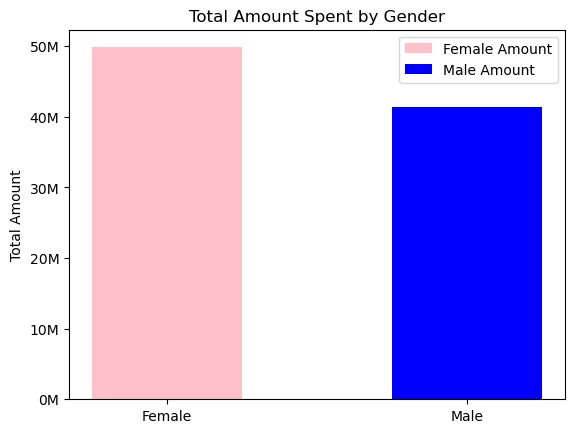

In [67]:
bar_width = 0.5  
x_labels = ['Female', 'Male']   
x_positions = [0, 1]

plt.bar([0], female_amount, width=bar_width, color='pink', label='Female Amount')
plt.bar([1], male_amount, width=bar_width, color='blue', label='Male Amount')

plt.yticks(range(0, int(max(female_amount, male_amount)) + 10000000, 10000000), 
           [f"{x // 1000000}M" for x in range(0, int(max(female_amount, male_amount)) + 10000000, 10000000)])

plt.title('Total Amount Spent by Gender')
plt.ylabel('Total Amount') 
plt.xticks(x_positions, x_labels) 
plt.legend()  
plt.show()

In [ ]:
##TOTAL AMOUNT SPENT BY AGE RANGE##

In [144]:
df['birth_year']=pd.to_datetime(df['dob']).dt.year

In [292]:
##filter the data by gender (F) and age

filtered_df_1 = df[(df['gender']=='F') & (df['birth_year'].between(1950, 1960))]
filtered_df_2 = df[(df['gender']=='F') & (df['birth_year'].between(1970, 1980))]
filtered_df_3 = df[(df['gender']=='F') & (df['birth_year'].between(1990, 2005))]

In [328]:
##filter the data by gender (M) and age

filtered_df_4 = df[(df['gender']=='M') & (df['birth_year'].between(1950, 1960))]
filtered_df_5 = df[(df['gender']=='M') & (df['birth_year'].between(1970, 1980))]  
filtered_df_6 = df[(df['gender']=='M') & (df['birth_year'].between(1990, 2005))]

In [330]:
##group the data into DataFrame

amount_spent_1 = filtered_df_1.groupby('birth_year')['amt'].sum().reset_index()
amount_spent_2 = filtered_df_2.groupby('birth_year')['amt'].sum().reset_index()
amount_spent_3 = filtered_df_3.groupby('birth_year')['amt'].sum().reset_index()

In [332]:
##group the data into DataFrame

amount_spent_4 = filtered_df_4.groupby('birth_year')['amt'].sum().reset_index()
amount_spent_5 = filtered_df_5.groupby('birth_year')['amt'].sum().reset_index()
amount_spent_5 = filtered_df_5.groupby('birth_year')['amt'].sum().reset_index()

In [364]:
##calculate the total amount spent by females

total_amount_spent_1 = filtered_df_1['amt'].sum()
total_amount_spent_2 = filtered_df_2['amt'].sum()
total_amount_spent_3 = filtered_df_3['amt'].sum()

In [334]:
##calculate the total amount spent by males

total_amount_spent_4 = filtered_df_4['amt'].sum()
total_amount_spent_5 = filtered_df_5['amt'].sum()
total_amount_spent_6 = filtered_df_6['amt'].sum()

In [336]:
plot_data = pd.DataFrame({'Category': ['1950-1960', '1970-1980', '1990-2005'], 'Total Amount Spent Females': [total_amount_spent_1, total_amount_spent_2, total_amount_spent_3],
                          'Total Amount Spent Males': [total_amount_spent_4, total_amount_spent_5, total_amount_spent_6]})

In [340]:
##the total amount spent by gender in their age range

print('The total amount spent by females born from 1950 to 1960:', total_amount_spent_1)
print('The total amount spent by females born from 1970 to 1980:', total_amount_spent_2)
print('The total amount spent by females born from 1990 to 2005:', total_amount_spent_3)

print('The total amount spent by males born from 1950 to 1960:', total_amount_spent_4)
print('The total amount spent by males born from 1970 to 1980:', total_amount_spent_5)
print('The total amount spent by males born from 1990 to 2005:', total_amount_spent_6)

The total amount spent by females born from 1950 to 1960: 5539629.43
The total amount spent by females born from 1970 to 1980: 13429908.459999999
The total amount spent by females born from 1990 to 2005: 8857536.04
The total amount spent by males born from 1950 to 1960: 4486923.509999999
The total amount spent by males born from 1970 to 1980: 10617769.650000002
The total amount spent by males born from 1990 to 2005: 7489686.629999998


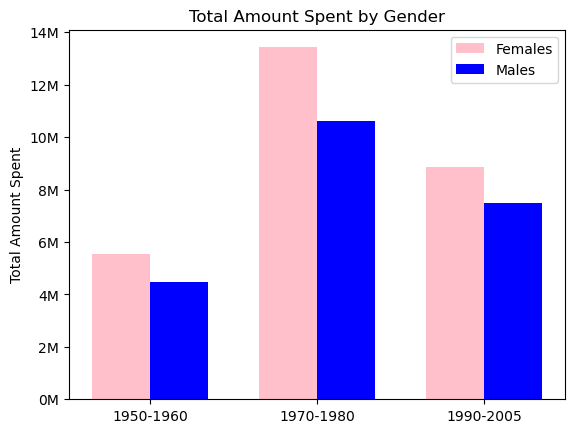

In [362]:
bar_width = 0.35  
x = range(len(plot_data['Category']))  

plt.bar(x, plot_data['Total Amount Spent Females'], color='pink', width=bar_width, label='Females')
plt.bar([i + bar_width for i in x], plot_data['Total Amount Spent Males'], color='blue', width=bar_width, label='Males')

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(2_000_000)) 
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x / 1_000_000)}M'))  


plt.ylabel('Total Amount Spent')
plt.title('Total Amount Spent by Gender')
plt.xticks([i + bar_width / 2 for i in x], plot_data['Category'])
plt.legend()

plt.show() 

In [ ]:
## CONCLUSIONS ##

In [ ]:
## Conclusion 1
## The data shows the biggest consumer of the product is women born between 1970-1980.
## Consider introducing credit card products that cater to the needs of females born in that
## time, such as groceries, education, childcare benefits.

In [ ]:
## Conclusion 2
## To better target both male and female users born in 1990-2005, consider collaborating with
## influencers to better attract that audience. 69.7% of U.S. companies leverage influencers to
## better attract the younger population.